In [52]:
import os
import sys
import pandas as pd
import scipy as sp
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

%matplotlib inline

In [39]:
def prdata(labels, preds, f1_threshold = None):
    precision, recall, thresholds = metrics.precision_recall_curve(labels, preds)
    numerator = 2 * recall * precision
    denom = recall + precision
    f1_scores = np.divide(numerator, denom, out=np.zeros_like(denom), where=(denom!=0))

    if not f1_threshold is None:
        # if testing, we use the override f1_threshold (usually from validation set)
        tthresh = thresholds[np.argmin(np.abs(thresholds-f1_threshold))]
        max_f1 = f1_scores[np.argmin(np.abs(thresholds-f1_threshold))]
        max_f1_precision = precision[np.argmin(np.abs(thresholds-f1_threshold))]
        max_f1_recall = recall[np.argmin(np.abs(thresholds-f1_threshold))]
        max_f1_thresh = f1_threshold
    else:
        max_f1_thresh = thresholds[np.argmax(f1_scores)]
        max_f1 = np.max(f1_scores)
        max_f1_precision = precision[np.argmax(f1_scores)]
        max_f1_recall = recall[np.argmax(f1_scores)]

    return {
        'precision': precision,
        'recall': recall,
        'max_f1': max_f1,
        'max_f1_threshold': max_f1_thresh,
        'max_f1_precision': max_f1_precision,
        'max_f1_recall': max_f1_recall,
        'pr_auc': metrics.auc(recall, precision)
    }

In [54]:
correct = [0.5833333333333333, 0.47058823529411764, 0.4, 0.5087719298245614, 0.6153846153846154, 0.4375, 0.5833333333333333, 0.5714285714285714, 0.59375, 0.4285714285714286, 0.4285714285714286, 0.4035087719298246, 0.5833333333333333, 0.5454545454545454, 0.5714285714285714, 0.5357142857142857, 0.75, 0.6428571428571428, 0.6428571428571428, 0.6428571428571428, 0.5454545454545454, 0.8, 0.5454545454545454, 0.7857142857142857, 0.5333333333333333]
incorrect = [0.47058823529411764, 0.6666666666666667, 0.5, 0.33333333333333337, 0.38095238095238093, 0.5, 0.44999999999999996, 0.6666666666666667, 0.5555555555555556, 0.5, 0.4444444444444444, 0.625, 0.7272727272727273, 0.625, 0.4, 0.5555555555555556, 0.625, 0.625, 0.4666666666666667, 0.3548387096774194, 0.5, 0.5, 0.4666666666666667, 0.5, 0.625, 0.4666666666666667]
len(correct), len(incorrect)

(25, 26)

In [55]:
np.mean(correct), np.mean(incorrect)

(0.5659680208852035, 0.5204182413622641)

(array([2., 2., 2., 4., 6., 2., 0., 5., 2., 1.]),
 array([0.33333333, 0.37272727, 0.41212121, 0.45151515, 0.49090909,
        0.53030303, 0.56969697, 0.60909091, 0.64848485, 0.68787879,
        0.72727273]),
 <BarContainer object of 10 artists>)

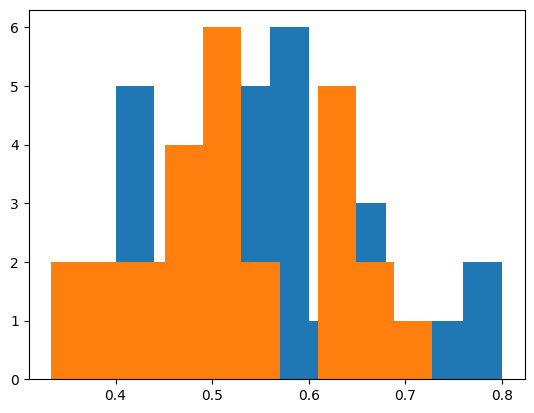

In [56]:
plt.hist(correct)
plt.hist(incorrect)

In [57]:
sp.stats.mannwhitneyu(correct, incorrect)

MannwhitneyuResult(statistic=398.0, pvalue=0.17117200878280736)

In [58]:
X = np.array(correct + incorrect).reshape((len(correct + incorrect), 1))
y = np.array([1 for _ in correct] + [0 for _ in incorrect])
X.shape, y.shape

((51, 1), (51,))

In [59]:
prdata(y, X)

{'precision': array([0.49019608, 0.5       , 0.51020408, 0.52083333, 0.52173913,
        0.51111111, 0.48837209, 0.47619048, 0.48780488, 0.5       ,
        0.54054054, 0.54285714, 0.65517241, 0.64285714, 0.62962963,
        0.61538462, 0.56521739, 0.61904762, 0.57894737, 0.5       ,
        0.46666667, 0.42857143, 0.66666667, 0.5       , 0.75      ,
        1.        , 1.        , 1.        , 1.        ]),
 'recall': array([1.  , 1.  , 1.  , 1.  , 0.96, 0.92, 0.84, 0.8 , 0.8 , 0.8 , 0.8 ,
        0.76, 0.76, 0.72, 0.68, 0.64, 0.52, 0.52, 0.44, 0.32, 0.28, 0.24,
        0.24, 0.12, 0.12, 0.12, 0.08, 0.04, 0.  ]),
 'max_f1': 0.7037037037037037,
 'max_f1_threshold': 0.5087719298245614,
 'max_f1_precision': 0.6551724137931034,
 'max_f1_recall': 0.76,
 'pr_auc': 0.6094884560503516}

In [60]:
precision, recall, thresholds = metrics.precision_recall_curve(y, X)

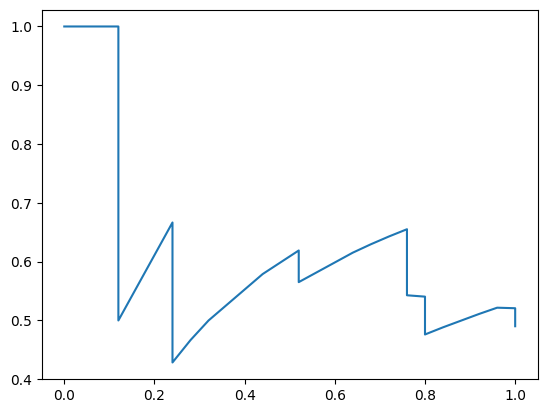

In [61]:
plt.plot(recall, precision)

In [62]:
pd.DataFrame(list(zip(precision, recall, thresholds)))

,0,1,2
0,0.490196,1.00,0.333333
1,0.500000,1.00,0.354839
2,0.510204,1.00,0.380952
3,0.520833,1.00,0.400000
4,0.521739,0.96,0.403509
5,0.511111,0.92,0.428571
6,0.488372,0.84,0.437500
7,0.476190,0.80,0.444444
8,0.487805,0.80,0.450000
9,0.500000,0.80,0.466667
